# Sentiment classification

## Model: Logistic regression

In [2]:
import tensorflow as tf
# load dataset from module keras.datasets.imdb
(x_train, y_train), (x_test, y_test)  = tf.keras.datasets.imdb.load_data()
x_train.shape

(25000,)

In [3]:
word_index = tf.keras.datasets.imdb.get_word_index()
# Reverse the word index to obtain a dict mapping indices to words
# And add `index_from` to indices to sync with `x_train`
inverted_word_index = dict(
    (i , word) for (word, i) in word_index.items()
)

### Review distribution

In [19]:
import numpy as np
import pandas as pd
x = np.concatenate((x_train, x_test))
y = np.concatenate((y_train, y_test))
x.resize(x.shape[0],1)
y.resize(y.shape[0],1)

data = np.concatenate((x,y), axis=1)
df = pd.DataFrame(data=data,
                  index = [i for i in range(data.shape[0])],
                  columns=['review', 'sentiment'])



,review,sentiment
0,"[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, ...",1
1,"[1, 194, 1153, 194, 8255, 78, 228, 5, 6, 1463,...",0
2,"[1, 14, 47, 8, 30, 31, 7, 4, 249, 108, 7, 4, 5...",0
3,"[1, 4, 18609, 16085, 33, 2804, 4, 2040, 432, 1...",1
4,"[1, 249, 1323, 7, 61, 113, 10, 10, 13, 1637, 1...",0


In [24]:
# remove newline(br) in each review
def remove_new_line_in_review(review):
    new_list = [x for x in review if x!=7 ]
    return new_list
df['review'] = df['review'].apply(lambda review: remove_new_line_in_review(review))

[1,
 785,
 189,
 438,
 47,
 110,
 142,
 6,
 7475,
 120,
 4,
 236,
 378,
 153,
 19,
 87,
 108,
 141,
 17,
 1004,
 5,
 30432,
 883,
 10789,
 23,
 8,
 4,
 136,
 13772,
 11631,
 4,
 7475,
 43,
 1076,
 21,
 1407,
 419,
 5,
 5202,
 120,
 91,
 682,
 189,
 2818,
 5,
 9,
 1348,
 31,
 4,
 118,
 785,
 189,
 108,
 126,
 93,
 13772,
 16,
 540,
 324,
 23,
 6,
 364,
 352,
 21,
 14,
 9,
 93,
 56,
 18,
 11,
 230,
 53,
 771,
 74,
 31,
 34,
 4,
 2834,
 4,
 22,
 5,
 14,
 11,
 471,
 9,
 17547,
 34,
 4,
 321,
 487,
 5,
 116,
 15,
 6584,
 4,
 22,
 9,
 6,
 2286,
 4,
 114,
 2679,
 23,
 107,
 293,
 1008,
 1172,
 5,
 328,
 1236,
 4,
 1375,
 109,
 9,
 6,
 132,
 773,
 14799,
 1412,
 8,
 1172,
 18,
 7865,
 29,
 9,
 276,
 11,
 6,
 2768,
 19,
 289,
 409,
 4,
 5341,
 2140,
 20250,
 648,
 1430,
 10136,
 8914,
 5,
 27,
 3000,
 1432,
 7130,
 103,
 6,
 346,
 137,
 11,
 4,
 2768,
 295,
 36,
 7740,
 725,
 6,
 3208,
 273,
 11,
 4,
 1513,
 15,
 1367,
 35,
 154,
 14040,
 103,
 19100,
 173,
 12,
 36,
 515,
 3547,
 94,
 2547,
 1

In [25]:
df['no. words'] = df['review'].str.len()
df.head()



,review,sentiment,no. words
0,"[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, ...",1,216
1,"[1, 194, 1153, 194, 8255, 78, 228, 5, 6, 1463,...",0,187
2,"[1, 14, 47, 8, 30, 31, 4, 249, 108, 4, 5974, 5...",0,137
3,"[1, 4, 18609, 16085, 33, 2804, 4, 2040, 432, 1...",1,529
4,"[1, 249, 1323, 61, 113, 10, 10, 13, 1637, 14, ...",0,143


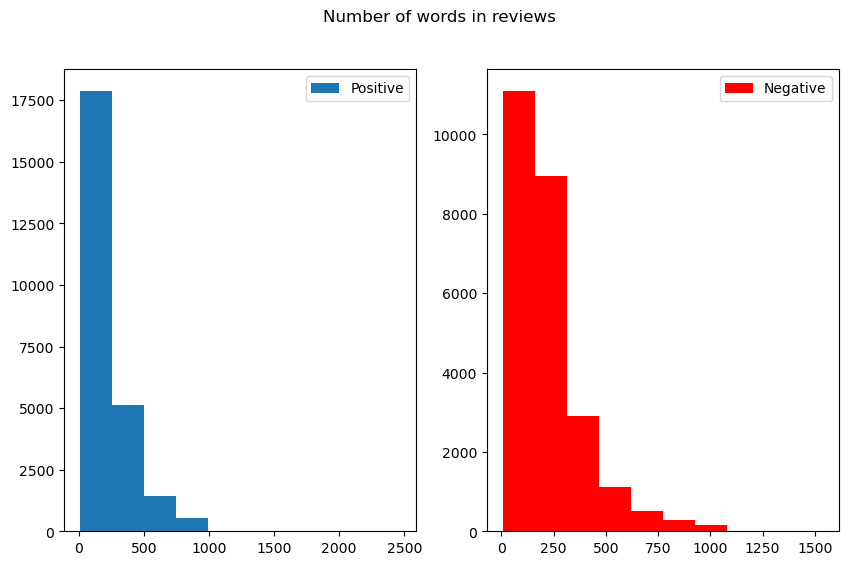

In [26]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,2,figsize=(10,6))
ax[0].hist(df[df['sentiment']==1]['no. words'], label='Positive')
ax[0].legend(loc='upper right')
ax[1].hist(df[df['sentiment']==0]['no. words'], label='Negative', color='red')
ax[1].legend(loc='upper right')
fig.suptitle("Number of words in reviews")
plt.show()

In [27]:
pos_reviews = df[df['sentiment']==1]['review']
neg_reviews = df[df['sentiment']==1]['review']

In [28]:
from collections import Counter
count = Counter()
for text in pos_reviews:
    for word_index in text:
        count[word_index]+=1

In [30]:
decoded_sequence = " ".join(inverted_word_index[i] for i in df['review'][10])
decoded_sequence

"the clear fact entertaining there life back is safely show of performance stars actors film him many should movie reasons to mikey reading blended are in of scenes jada carbon of safely out compared not boss yes to sentiment show its disappointed fact raw to it justice by of where clear fact many your way jada with city nice are is along wrong not as it way she but this anything up haven't been by who of choices of you to as this i'd it mcdoakes who of shot you'll to love for updated of you it is sequels of little quest are seen watched front chemistry to simply alive of chris being it is say easy reservation cry in chemistry but voodoo all it maybe this is wing film job live of objects relief aneta level names lifelong dunne to be stops serial 1948 watch is men go this of wing american from russo moving is accepted put this of jerry for places so work moby watch holodeck lot that from sometimes wondered make department introduced to wondered from action at turns in low that in gay i'

In [29]:
pos_words = pd.DataFrame(data= count.most_common(15), columns=['word_index', 'count'])
pos_words['word'] = pos_words['word_index'].apply(lambda index: inverted_word_index[index])
pos_words.head()

,word_index,count,word
0,4,340558,of
1,5,176578,to
2,6,164221,is
3,8,131300,in
4,9,111812,it


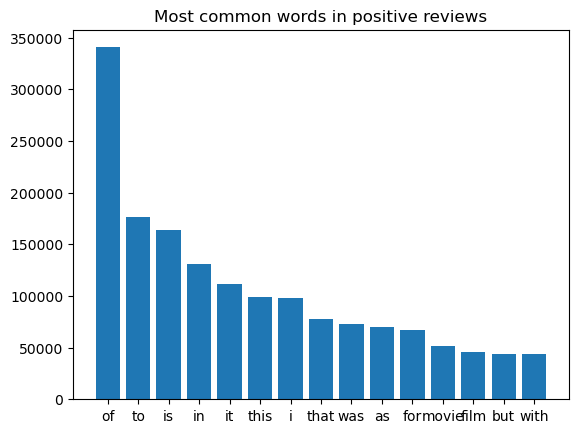

In [32]:
fig, ax = plt.subplots()
ax.bar(pos_words['word'],pos_words['count'])
ax.set_title('Most common words in positive reviews')
plt.show()

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

number_of_classes = 2
number_of_features = 25000
model = Sequential()
model.add(Dense(number_of_classes,activation = 'sigmoid',input_dim = number_of_features))
model.compile(optimizer='adam', metrics=['accuracy'])

c:\Users\legolas\anaconda3\envs\tf_cpu\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model.fit(x_train, y_train, epochs=10)
results = model.evaluate(x=x_test, y=y_test, batch_size=128)
print("test loss, test acc:", results)



ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type list).